
Esercizio finale

Obiettivo: Creare un modello di Machine Learning per classificare le cifre da 0 a 9 utilizzando il
dataset MNIST Digits.

Punti dell'esercizio

Importazione dei Dati
Carica il dataset MNIST Digits utilizzando sklearn.datasets.
Visualizza alcune cifre per comprendere i dati.
Preprocessing dei Dati
Normalizza i dati dividendo i valori dei pixel per il massimo valore possibile (16).
Dividi il dataset in un training set e un test set usando train_test_split.
Scelta del Modello
Scegli un algoritmo di classificazione, come Support Vector Machine (SVM) o Random Forest.
Configura il modello con parametri di base.
Addestramento del Modello
Addestra il modello sui dati di training.
Verifica che il processo termini senza errori.
Valutazione del Modello
Utilizza il test set per valutare il modello.
Calcola l'accuratezza e stampa un report di classificazione.
Visualizzazione dei Risultati
Mostra alcune immagini del test set con le loro predizioni e i valori reali.
Identifica eventuali errori di classificazione.
Esperimenti Extra (Facoltativo)
Cambia il modello con un altro algoritmo (es. k-Nearest Neighbors o Decision Tree).
Applica la cross-validation per migliorare la stabilità delle valutazioni.
Genera una matrice di confusione per analizzare gli errori.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.decomposition import PCA

In [2]:
## Importazione dei Dati
## Carica il dataset MNIST Digits utilizzando sklearn.datasets.
## Visualizza alcune cifre per comprendere i dati.

from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data  # caratteristiche
y = digits.target  # target

print(digits.data.shape)
digits_data = digits.data

(1797, 64)


In [3]:
digits_df = pd.DataFrame(data = digits.data, columns = digits.feature_names)
print(digits_df.head)

## Comprendo che abbiamo un totale di 1794 entries composte da 64 pixel ciascuna

<bound method NDFrame.head of       pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0 

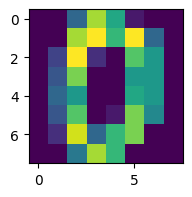

In [4]:
## Estraggo il dataframe composto da immagini di 64x64 pixels

import matplotlib.pyplot as plt

plt.figure(figsize = (2, 2) )
plt.imshow(digits.images[0])
plt.show()

<Figure size 500x500 with 0 Axes>

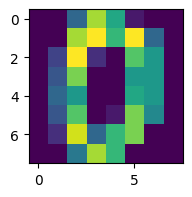

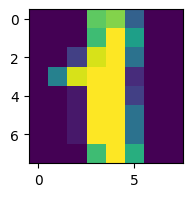

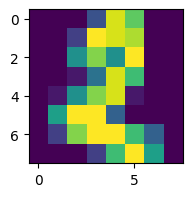

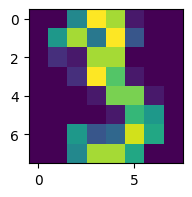

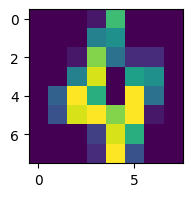

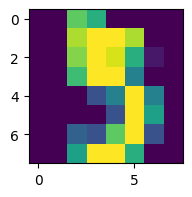

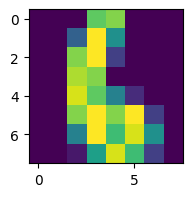

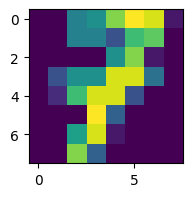

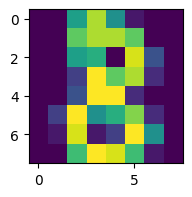

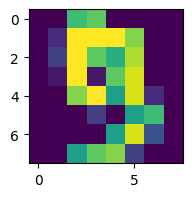

In [5]:
## Le 10 cifre arabe che vanno da 0 a 9 sono le seguenti:


plt.figure(figsize = (5, 5) )

for i in range(0, 10):

    plt.figure(figsize = (2, 2) )
    plt.imshow(digits.images[i])
    plt.show()

In [6]:
## Preprocessing dei Dati: Normalizza i dati dividendo i valori dei pixel per il massimo valore possibile (16).

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X, 16)

In [7]:
## Suddividi il dataset in set di training e test.
# Dividi i dati in 80% training e 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
## Applica PCA per ridurre i dati da 64 dimensioni (8x8 pixel) a 2 dimensioni.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X_scaled)


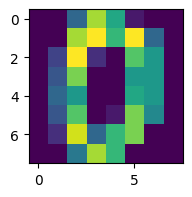

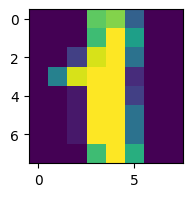

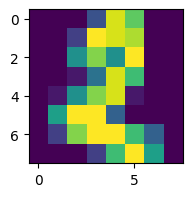

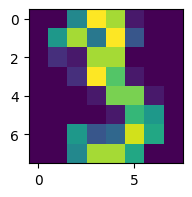

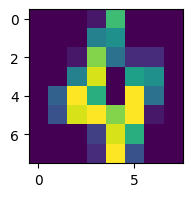

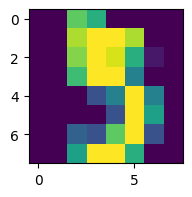

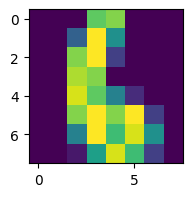

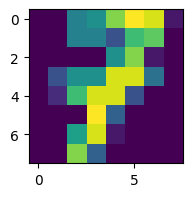

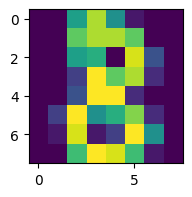

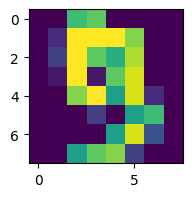

In [9]:
## Visualizza i dati nel nuovo spazio bidimensionale, colorando i punti in base alla cifra rappresentata.
for i in range(0, 10):

    plt.figure(figsize = (2, 2) )
    plt.imshow(digits.images[i])
    plt.show()

In [10]:
## Scelta del Modello
## Scegli un algoritmo di classificazione, come Support Vector Machine (SVM) o Random Forest.
## Configura il modello con parametri di base.

## rubato da https://www.geeksforgeeks.org/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

from sklearn import svm

svm_model = svm.SVC(kernel = "linear")
svm_model.fit(X, y)

SVC(kernel='linear')

In [11]:
## Addestramento del Modello:
## Addestra il modello sui dati di training.
## Verifica che il processo termini senza errori.

# Predict using the SVM model
predictions = svm_model.predict(X)

In [12]:
## Valutazione del Modello
## Utilizza il test set per valutare il modello.
## Calcola l'accuratezza e stampa un report di classificazione.

# Evaluate the predictions
accuracy = svm_model.score(X, y)
print("Accuracy of standard SVM:", accuracy)

Accuracy of standard SVM: 0.6282693377851976


In [13]:
# Create a kernel support vector machine model
ksvm = svm.SVC(kernel = "rbf",
               gamma = 0.1,
               C = 10.0)
 
# Train the model on the training data
ksvm.fit(X_train, y_train)
 
# Evaluate the model on the test data
accuracy = ksvm.score(X_test, y_test)
print('Accuracy of standard rfb:', accuracy)

Accuracy of standard rfb: 0.07777777777777778


Molto strano che con un modello rbf e parametri gamma 0.1 e C = 10 l'accuratezza scenda vertiginosamente

In [14]:
## testo tutte le varianti di kernels:
## ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed

kernels = ["linear", "poly", "rbf", "sigmoid", "precomputed"]

for kernel in kernels:
    # Create a kernel support vector machine model
    ksvm = svm.SVC(kernel = "rbf",
                   gamma = 0.1,
                   C = 10.0)
 
# Train the model on the training data
    ksvm.fit(X_train, y_train)
 
# Evaluate the model on the test data
    accuracy = ksvm.score(X_test, y_test)
    print('Accuracy del kernel:', kernel, accuracy)

Accuracy del kernel: linear 0.07777777777777778
Accuracy del kernel: poly 0.07777777777777778
Accuracy del kernel: rbf 0.07777777777777778
Accuracy del kernel: sigmoid 0.07777777777777778
Accuracy del kernel: precomputed 0.07777777777777778


il problema sembra essere più legato ai valori probabilmente

In [15]:
## testo tutte le varianti di kernels:
## ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed

kernels = ["linear", "poly", "rbf", "sigmoid", "precomputed"]

for kernel in kernels:
    # Create a kernel support vector machine model
    ksvm = svm.SVC(kernel = "rbf",
                   gamma = 0.5,
                   C = 50.0)
 
# Train the model on the training data
    ksvm.fit(X_train, y_train)
 
# Evaluate the model on the test data
    accuracy = ksvm.score(X_test, y_test)
    print('Accuracy del kernel:', kernel, accuracy)

Accuracy del kernel: linear 0.07777777777777778
Accuracy del kernel: poly 0.07777777777777778
Accuracy del kernel: rbf 0.07777777777777778
Accuracy del kernel: sigmoid 0.07777777777777778
Accuracy del kernel: precomputed 0.07777777777777778


In [16]:
## testo tutte le varianti di kernels:
## ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed

kernels = ["linear", "poly", "rbf", "sigmoid", "precomputed"]

for kernel in kernels:
    # Create a kernel support vector machine model
    ksvm = svm.SVC(kernel = "rbf",
                   gamma = 0.01,
                   C = 5.0)
 
# Train the model on the training data
    ksvm.fit(X_train, y_train)
 
# Evaluate the model on the test data
    accuracy = ksvm.score(X_test, y_test)
    print('Accuracy del kernel:', kernel, accuracy)

Accuracy del kernel: linear 0.8138888888888889
Accuracy del kernel: poly 0.8138888888888889
Accuracy del kernel: rbf 0.8138888888888889
Accuracy del kernel: sigmoid 0.8138888888888889
Accuracy del kernel: precomputed 0.8138888888888889


Accuracy of standard SVM: 0.6288258208124652
Accuracy of standard rfb: 0.07777777777777778

noto che paramentri più bassi portano a migliori performance, con 0.81

In [17]:
## testo tutte le varianti di kernels:
## ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed

kernels = ["linear", "poly", "rbf", "sigmoid", "precomputed"]

for kernel in kernels:
    # Create a kernel support vector machine model
    ksvm = svm.SVC(kernel = "rbf",
                   gamma = 0.005,
                   C = 1.0)
 
# Train the model on the training data
    ksvm.fit(X_train, y_train)
 
# Evaluate the model on the test data
    accuracy = ksvm.score(X_test, y_test)
    print('Accuracy del kernel:', kernel, accuracy)

Accuracy del kernel: linear 0.9583333333333334
Accuracy del kernel: poly 0.9583333333333334
Accuracy del kernel: rbf 0.9583333333333334
Accuracy del kernel: sigmoid 0.9583333333333334
Accuracy del kernel: precomputed 0.9583333333333334


In [18]:
## testo tutte le varianti di kernels:
## ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed

kernels = ["linear", "poly", "rbf", "sigmoid", "precomputed"]

for kernel in kernels:
    # Create a kernel support vector machine model
    ksvm = svm.SVC(kernel = "rbf",
                   gamma = 0.0005,
                   C = 0.5)
 
# Train the model on the training data
    ksvm.fit(X_train, y_train)
 
# Evaluate the model on the test data
    accuracy = ksvm.score(X_test, y_test)
    print('Accuracy del kernel:', kernel, accuracy)

Accuracy del kernel: linear 0.9861111111111112
Accuracy del kernel: poly 0.9861111111111112
Accuracy del kernel: rbf 0.9861111111111112
Accuracy del kernel: sigmoid 0.9861111111111112
Accuracy del kernel: precomputed 0.9861111111111112


Ci sono guadagni sempre maggiori all'introduzione di valori sempre più piccoli, risulta ininfluente la scelta del kernel

Visualizzazione dei Risultati
Mostra alcune immagini del test set con le loro predizioni e i valori reali.
Identifica eventuali errori di classificazione.

Esperimenti Extra (Facoltativo)
Cambia il modello con un altro algoritmo (es. k-Nearest Neighbors o Decision Tree).
Applica la cross-validation per migliorare la stabilità delle valutazioni.
Genera una matrice di confusione per analizzare gli errori.